# Reasonable Recommendations - A joke recommender system

A short description of our project.

#### Summary

1. Dataset
2. Prototype Recommender System

#### 1. Dataset

A short description of our data set and where we got it from.

In [9]:
import pandas as pd
ratings_df = pd.read_csv("jester_ratings.csv") 
display(ratings_df.head(10))

,userId,jokeId,rating
0,1,5,0.219
1,1,7,-9.281
2,1,8,-9.281
3,1,13,-6.781
4,1,15,0.875
5,1,16,-9.656
6,1,17,-9.031
7,1,18,-7.469
8,1,19,-8.719
9,1,20,-9.156


In [10]:
jokes_df = pd.read_csv("jester_items.csv")
display(jokes_df)

,jokeId,jokeText
0,1,"A man visits the doctor. The doctor says ""I ha..."
1,2,This couple had an excellent relationship goin...
2,3,Q. What's 200 feet long and has 4 teeth? \n\nA...
3,4,Q. What's the difference between a man and a t...
4,5,Q.\tWhat's O. J. Simpson's Internet address? \...
...,...,...
145,146,America: 8:00 - Welcome to work! 12:00 - Lunch...
146,147,It was the day of the big sale. Rumors of the ...
147,148,"Recently a teacher, a garbage collector, and a..."
148,149,"A little girl asked her father, ""Daddy? Do all..."


Next we plot the number of jokes rated (y-axis) by each user (x-axis).

,ratings_count
userId,
1,62
2,34
3,18
4,3
5,82
...,...
63974,10
63975,8
63976,3


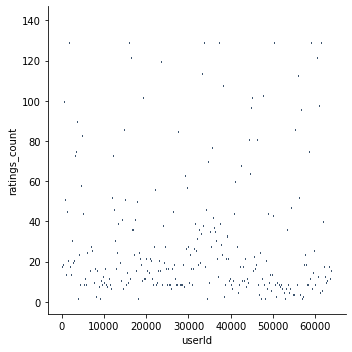

In [35]:
count_ratings_df = ratings_df[['userId', 'jokeId']].groupby(['userId']).count()
count_ratings_df.columns = ['ratings_count']
display(count_ratings_df)
sns.displot(data=count_ratings_df, x='userId', y='ratings_count', binwidth=1)

,ratings_count
jokeId,
5,661
7,59122
8,57720
13,56333
15,54932
...,...
146,4913
147,9728
148,14988


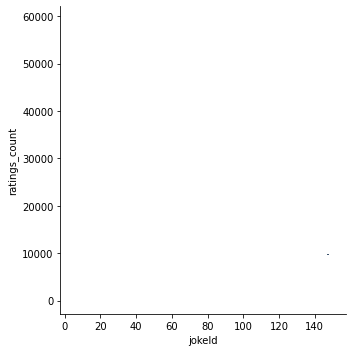

In [40]:
count_ratings_df = ratings_df[['userId', 'jokeId']].groupby(['jokeId']).count()
count_ratings_df.columns = ['ratings_count']
display(count_ratings_df)
sns.displot(data=count_ratings_df, x='jokeId', y='ratings_count', binwidth=1)

,userId
jokeId,
5,661
7,59122
8,57720
13,56333
15,54932
...,...
146,4913
147,9728
148,14988


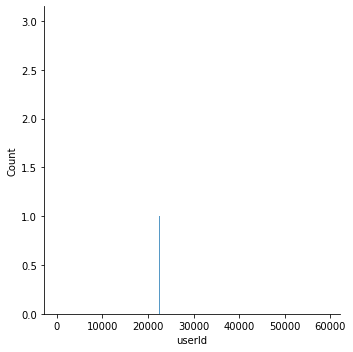

In [11]:
import seaborn as sns

count_ratings_df = ratings_df[['userId','jokeId']].groupby(['jokeId']).count()
display(count_ratings_df)
sns.displot(data=count_ratings_df, x='userId', binwidth=1)

It looks like one user rated around a million jokes?

,index,jokeId,userId
0,0,7,59122
1,1,8,57720
2,2,13,56333
3,3,15,54932
4,4,16,54150
...,...,...,...
135,135,73,167
136,136,80,167
137,137,116,166
138,138,43,166


<AxesSubplot:xlabel='index', ylabel='userId'>

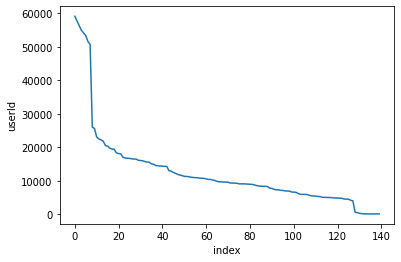

In [7]:
count_ratings_df_ord = count_ratings_df.sort_values(by="userId", ascending=False).reset_index().reset_index()
display(count_ratings_df_ord)
sns.lineplot(data=count_ratings_df_ord, x='index', y='userId')

#### 2. Prototype Recommender System